In [1]:
from google.colab import files # функция загрузки файлов с компьютера

import numpy as np # библиотека для создания массивов
import pandas as pd # библиотека для создания таблиц (датафреймов)
from io import BytesIO # библиотека для обработки байтовой информации

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error

In [3]:
from sklearn.linear_model import Lasso

In [4]:
dataset = files.upload() # выгружаем датасет
dataset = pd.read_csv(BytesIO(list(dataset.values())[0])) # преобразуем датасет в датафрейм
dataset

Saving train (2).csv to train (2).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_cleaned = dataset.dropna()
dataset = df_cleaned
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [6]:
dataset.isna().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,False
SibSp,False
Parch,False
Ticket,False
Fare,False


In [7]:
dataset = dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)
dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,False,False,False
3,1,1,35.0,1,0,53.1000,False,False,True
6,0,1,54.0,0,0,51.8625,True,False,True
10,1,3,4.0,1,1,16.7000,False,False,True
11,1,1,58.0,0,0,26.5500,False,False,True
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,False,False,True
872,0,1,33.0,0,0,5.0000,True,False,True
879,1,1,56.0,0,1,83.1583,False,False,False
887,1,1,19.0,0,0,30.0000,False,False,True


In [28]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.6, random_state=123)

In [29]:
from sklearn.tree import DecisionTreeClassifier

max_depth = X_train.shape[1]

model = DecisionTreeClassifier(max_depth=max_depth, random_state=123)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=123)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

y_test_pred = model.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))

Accuracy on test set: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.80      0.80      0.80        10

    accuracy                           0.71        14
   macro avg       0.65      0.65      0.65        14
weighted avg       0.71      0.71      0.71        14



In [31]:
y_val_pred = model.predict(X_val)
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(classification_report(y_val, y_val_pred))

Accuracy on validation set: 0.7391304347826086
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.78      0.88      0.82        16

    accuracy                           0.74        23
   macro avg       0.69      0.65      0.66        23
weighted avg       0.72      0.74      0.73        23



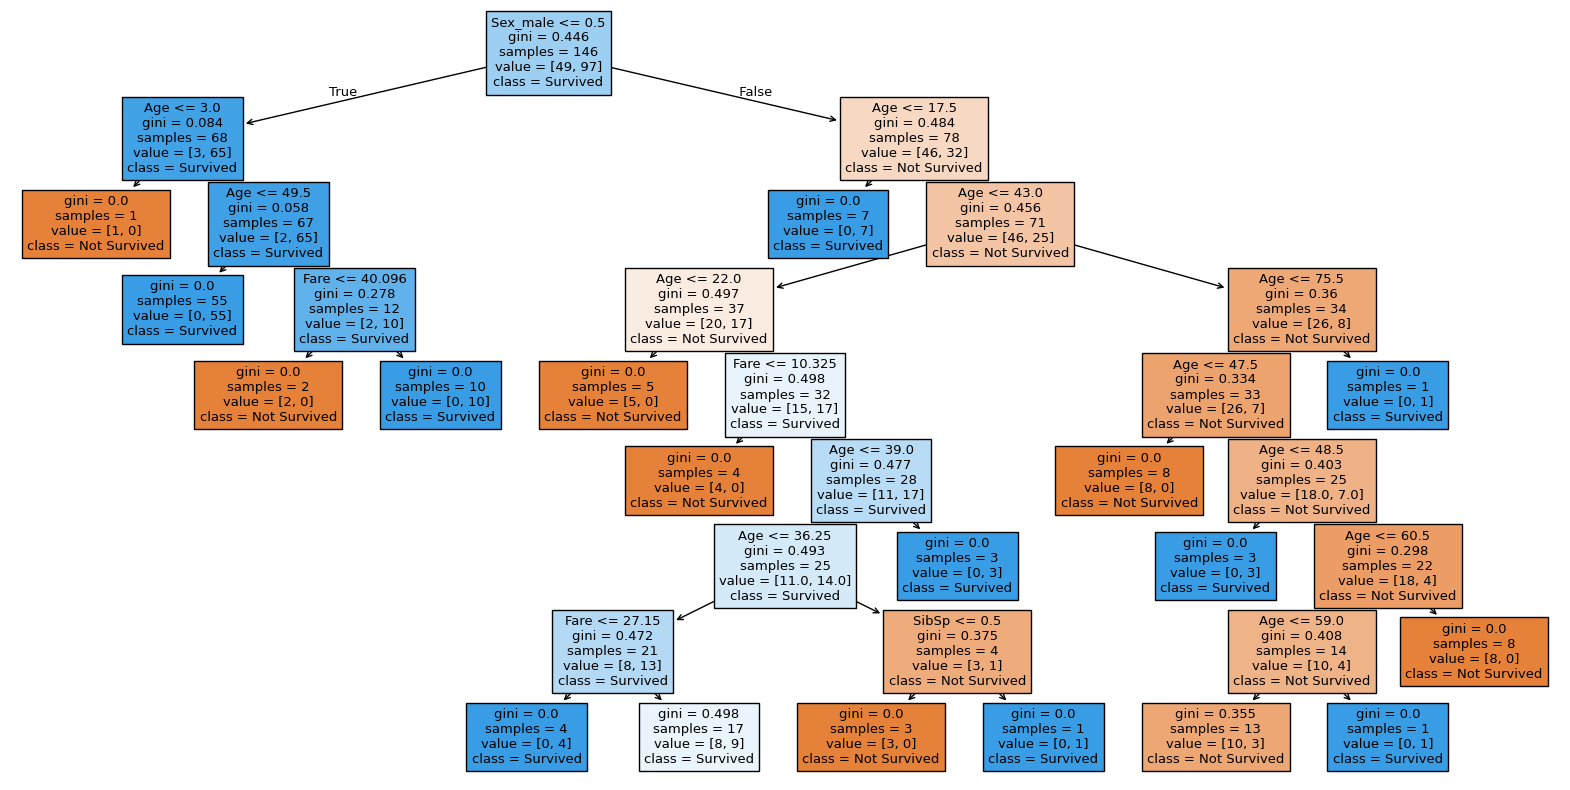

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Построение дерева
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True
)
plt.show()